<a href="https://colab.research.google.com/github/Piyaphum/Diabetes-Prediction/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [154]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Import Library ที่จำเป็น**

In [169]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, confusion_matrix

**อ่านไฟล์**

In [156]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**เรียกขนาดข้อมูล**

In [157]:
df.shape

(768, 9)

**Data Preprocessing**
  **เราจะทำการ drop Outcome ออกไปก่อนเพื่อให้โมเดล predict ไปก่อนแล้วค่อยนำมาเช็คอีกที**

In [158]:
# x จะเก็บ array 2 มิติไว้
x = df.drop('Outcome', axis = 1).values #เพิ่ม .values เพื่อเอาชื่อคอลัมน์ออกไป เพราะต้องการแค่ข้อมูลแบบ array 2D
x

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [159]:
# y จะเก็บผลเฉลยไว้ (Outcome)
y = df['Outcome'].values
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

**แบ่งข้อมูลออกเป็น 2 ส่วน (Training Set / Test Set)**

In [160]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)
y_test

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,

**หาค่า K ที่เหมาะสมที่สุด**

In [161]:
# ลองหาค่า k จาก 1-8 แล้วนำไปสร้าง model ออกมาจากนั้นนำมาเทียบกันว่าตัวไหนดีที่สุด
k_number = np.arange(1,9)

In [162]:
#นำค่า accuracy แต่ละรอบมาเก็บไว้ใน array เปล่า ๆ จากนั้นสังเกตุ accuracy แต่ละรอบจากการพล็อตกราฟ
train_score = np.empty(len(k_number))
test_score = np.empty(len(k_number))

In [163]:
# เริ่ม train model
for i, k in enumerate(k_number) :
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train, y_train)
  #โยนค่าวัดประสิทธิภาพแต่ละรอบลง empty array
  train_score[i] = knn.score(x_train, y_train)
  test_score[i] = knn.score(x_test, y_test)

  print(f'Accuracy for Round {i+1} : {test_score[i] * 100:.2f}%')

Accuracy for Round 1 : 68.83%
Accuracy for Round 2 : 69.81%
Accuracy for Round 3 : 69.81%
Accuracy for Round 4 : 71.10%
Accuracy for Round 5 : 71.43%
Accuracy for Round 6 : 73.70%
Accuracy for Round 7 : 71.75%
Accuracy for Round 8 : 73.38%


**ดังนั้นใช้ k = 8 ดีที่สุด**

**พล็อตกราฟเพื่อเทียบความแตกต่างของ Accuracy ในแต่ละรอบ**

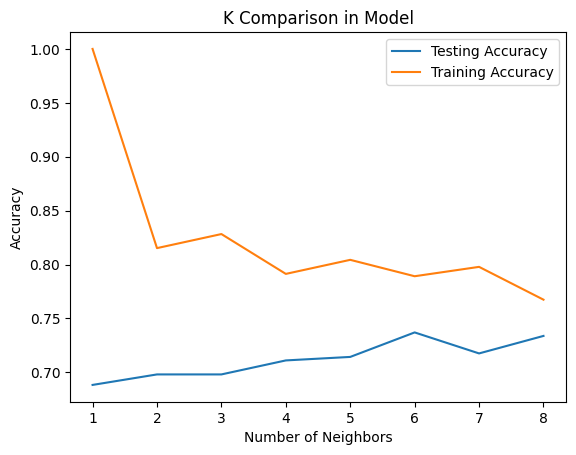

In [164]:
plt.title('K Comparison in Model')
plt.plot(k_number, test_score, label='Testing Accuracy')
plt.plot(k_number, train_score, label='Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

**หลังได้ค่า k ที่เหมาะสมนั่นคือ k = 8 แล้ว เริ่มการ prediction ต่อเลย**

In [165]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=8)

**สร้างตัวแปร y ไส้เก็บค่าที่ model predict**

In [166]:
y_pred = knn.predict(x_test)

**เปรียบเทียบข้อมูล Outcome กับ y_pred**

In [167]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.87      0.82       207
           1       0.63      0.45      0.52       101

    accuracy                           0.73       308
   macro avg       0.70      0.66      0.67       308
weighted avg       0.72      0.73      0.72       308



In [171]:
pd.crosstab(y_test, y_pred, rownames=['Actually'], colnames=['Prediction'], margins=True)

Prediction,0,1,All
Actually,,,
0,181,26,207
1,56,45,101
All,237,71,308


**แถวแรก (0): มี 181 คนที่ไม่เป็นเบาหวานและถูกทำนายถูกต้อง, 26 คนที่ไม่เป็นเบาหวานแต่ถูกทำนายผิดว่าเป็นเบาหวาน, รวมทั้งหมด 207 คนที่ไม่เป็นเบาหวาน

แถวที่สอง (1): มี 56 คนที่เป็นเบาหวานและถูกทำนายถูกต้อง, 45 คนที่เป็นเบาหวานแต่ถูกทำนายผิดว่าไม่เป็นเบาหวาน, รวมทั้งหมด 101 คนที่เป็นเบาหวาน

ทั้งหมด: มี 237 คนที่ถูกทำนายถูกต้อง (181 + 56), 71 คนที่ถูกทำนายผิด (26 + 45), และรวมทั้งหมด 308 คน**